In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('/content/Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
data.isna().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
from

In [7]:
x = data.iloc[:,1:8] #index locator[no.of.rows,no.of cols]- all rows and 8 cols
y= data.iloc[:,8:9]


In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.2)

In [9]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [10]:
L.fit(xtrain,ytrain)

LinearRegression()

In [11]:
ypred=L.predict(xtest)

In [12]:
from sklearn.metrics import r2_score
print("Accuracy:",r2_score(ypred,ytest))

Accuracy: 0.7395549845872347


In [13]:
from sklearn.metrics import mean_squared_error as mse
print("MSE:",mse(ypred,ytest))

MSE: 0.0042918341512780175


In [15]:
L.coef_

array([[ 0.00153844,  0.00347837,  0.00744247, -0.00658418,  0.02730136,
         0.11324426,  0.03028134]])

In [17]:
new_input = [320,108,3,3.5,4,8.44,1]
predicted_value = L.predict([new_input])
print(predicted_value)

[[0.73958686]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


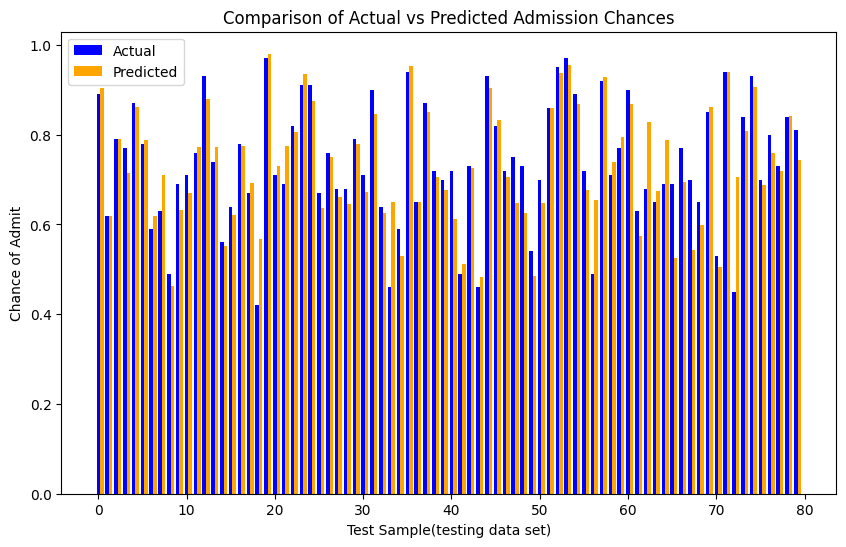

In [19]:
#Prediction Analysis
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
index = range(len(ypred))  # Number of predictions

plt.bar(index, ytest.values.flatten(), color='blue', width=0.4, label='Actual')
plt.bar([i + 0.4 for i in index], ypred.flatten(), color='orange', width=0.4, label='Predicted')

plt.xlabel('Test Sample(testing data set)')
plt.ylabel('Chance of Admit')
plt.title('Comparison of Actual vs Predicted Admission Chances')
plt.legend()
plt.show()


In [21]:
print(data.columns)


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [22]:
data.columns = data.columns.str.strip()


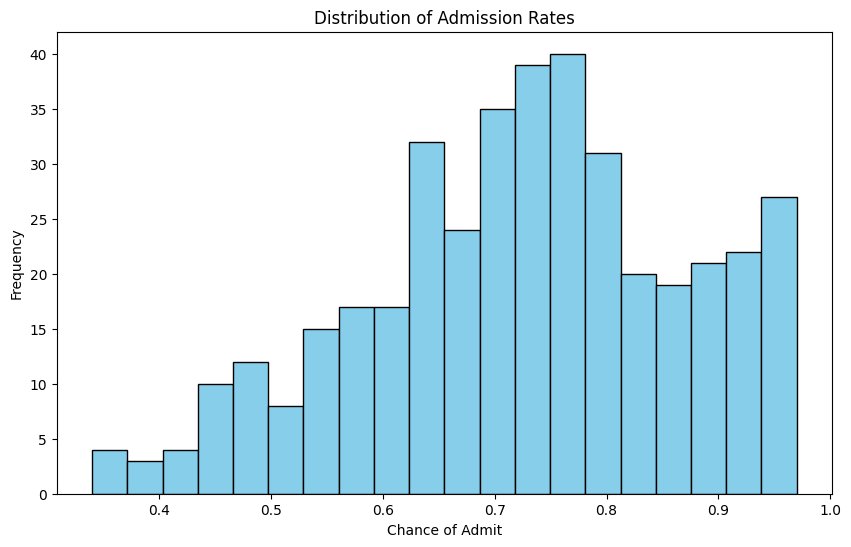

In [23]:
#Admission Analysis
import matplotlib.pyplot as plt
admission_rates = data['Chance of Admit']
plt.figure(figsize=(10, 6))
plt.hist(admission_rates, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Chance of Admit')
plt.ylabel('Frequency')
plt.title('Distribution of Admission Rates')
plt.show()


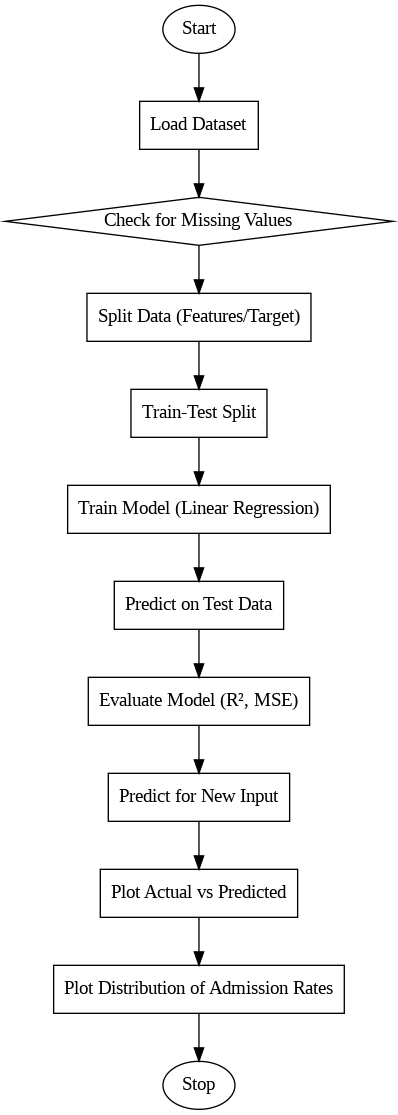

In [25]:
from graphviz import Digraph
from IPython.display import Image, display
dot = Digraph(comment='Code Workflow from Start to Stop')
dot.node('A', 'Start', shape='ellipse')
dot.node('B', 'Load Dataset', shape='box')
dot.node('C', 'Check for Missing Values', shape='diamond')
dot.node('D', 'Split Data (Features/Target)', shape='box')
dot.node('E', 'Train-Test Split', shape='box')
dot.node('F', 'Train Model (Linear Regression)', shape='box')
dot.node('G', 'Predict on Test Data', shape='box')
dot.node('H', 'Evaluate Model (R², MSE)', shape='box')
dot.node('I', 'Predict for New Input', shape='box')
dot.node('J', 'Plot Actual vs Predicted', shape='box')
dot.node('K', 'Plot Distribution of Admission Rates', shape='box')
dot.node('L', 'Stop', shape='ellipse')
dot.edge('A', 'B')
dot.edge('B', 'C')
dot.edge('C', 'D')
dot.edge('D', 'E')
dot.edge('E', 'F')
dot.edge('F', 'G')
dot.edge('G', 'H')
dot.edge('H', 'I')
dot.edge('I', 'J')
dot.edge('J', 'K')
dot.edge('K', 'L')
dot.render('code_workflow', format='png')
display(Image(filename='code_workflow.png'))
